In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import odr
import iminuit
from iminuit import Minuit
from iminuit.cost import LeastSquares

In [31]:
df = pd.read_excel(
    r"C:\Users\dario\OneDrive\Desktop\università\Laurea_Magistrale\Laboratorio_4\Esperienze_lab\Esperienza1\Misura_Kb_tensione_copia.xlsx",
    usecols="E:J",
    nrows = 20
)
c = np.array(df["Capacità misurata (nF)"])
err_c = np.array(df["Err C (nF)"])

v = np.array(df["V2 (V)"])
err_v = np.array(df["Err V ( V)"])

c_rev = 1 / c
err_c_rev = err_c/ c**2


In [54]:
# valori numerici da inserire per il calcolo di K_B

Rv = 9.1*10**6
T = 300
R_av = 1.5*10**6
Y2 = (1.01*10**6)**2
U_star = ((Rv + R_av)/ Rv) / Y2
print(f"U_star = {U_star}")

U_star = 1.1418833102981717e-12


In [33]:
print("errori di 1/C: ", list(err_c_rev), "\n")
print("errori su V2: ", list(err_v), "\n \n ")
print("si possono trascurare gli errori sulle x -> fit col metodo dei minimi quadrati")

errori di 1/C:  [0.0005117707267144319, 0.0003930817610062893, 0.0011145786892554615, 0.0002192982456140351, 0.00014001680201624193, 0.0007415097137772504, 0.000829324929507381, 6.677350427350428e-05, 8.012820512820513e-05, 0.0010841283607979184, 0.0003558718861209964, 0.0004389815627743635, 0.00011394712853236097, 0.00019755037534571315, 0.0006301197227473221, 4.8216007714561236e-05, 0.0002901915264074289, 0.0002573340195573855, 8.503401360544218e-05, 0.00010504201680672268] 

errori su V2:  [0.0598, 0.0592, 0.08000000000000002, 0.05, 0.06530000000000001, 0.0738, 0.07375000000000001, 0.05035, 0.05115, 0.08655000000000002, 0.07780000000000001, 0.0697, 0.05600000000000001, 0.07415000000000001, 0.08125, 0.051300000000000005, 0.07255, 0.05895, 0.04845, 0.05495] 
 
 
si possono trascurare gli errori sulle x -> fit col metodo dei minimi quadrati


In [34]:
df

,Capacità (pF),Capacità misurata (nF),1/C,V2 (V),Err C (nF),Err V ( V)
0,10000,9.770,0.102354,1.196,0.048850,0.05980
1,13300,12.720,0.078616,1.184,0.063600,0.05920
2,4700,4.486,0.222916,1.600,0.022430,0.08000
3,22000,22.800,0.043860,1.000,0.114000,0.05000
4,33000,35.710,0.028003,1.306,0.178550,0.06530
5,7800,6.743,0.148302,1.476,0.033715,0.07380
6,6600,6.029,0.165865,1.475,0.030145,0.07375
7,78000,74.880,0.013355,1.007,0.374400,0.05035
8,68000,62.400,0.016026,1.023,0.312000,0.05115
9,5600,4.612,0.216826,1.731,0.023060,0.08655


Il modello è $y = a x + b$ 

 $V_2 = \frac{K_B T}{U^* C}$

 con $y = V_2$,  $a = \frac{K_B T}{U^* C}$ ,  x = 1/C

 Valori numerici: 

- $T = 25 °C = 300 K$
- $U^* = \frac{U_m}{Y^2} \frac{R_1}{R_1 + R_2} \frac{R_V + R_{av}}{R_V}$
 con $U_m = 10 V,  Y = 1.01·10^6 , R_2 = 9R_1, R_{av} = 1.5 M \Omega, R_V = 9.1 M \Omega$
 



Fit lineare con Minuit nel caso in cui gli errori sulle x siano effettivamente trascurabili


 ### FIT LINEARE NEL CASO IN CUI SIANO TRASCURABILI GLI ERRORI SULLE X (fit con Minuit)
 #### Fit con iMinuit



In [35]:
def line(x, a, b):
    return a*x + b
least_squares = LeastSquares(c_rev, v, err_v, line)
m = Minuit(least_squares, a = 1, b = 0)

In [36]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94.7 (χ²/ndof = 5.3)       │              Nfcn = 31               │
│ EDM = 1.6e-23 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.09    │   0.24    │            │            │         │         │       │
│ 1 │ b    │   1.027   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │   0.0585  -3.5e-3 │
│ b │  -3.5e-3 0.000399 │
└───┴───────────────────┘

In [37]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 94.7 (χ²/ndof = 5.3)       │              Nfcn = 41               │
│ EDM = 5.74e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   3.09    │   0.24    │            │            │         │         │       │
│ 1 │ b    │   1.027   │   0.020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │   0.0585  -3.5e-3 │
│ b │  -3.5e-3 0.000399 │
└───┴───────────────────┘

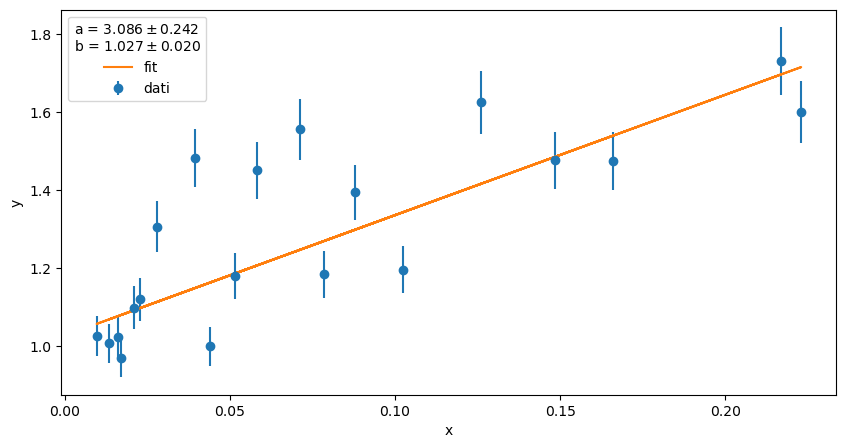

In [38]:
plt.figure(figsize=(10, 5))
plt.errorbar(c_rev, v, err_v, fmt="o", label="dati")
plt.plot(c_rev, line(c_rev, *m.values), label="fit")
fit_info = [ ]
for i, j, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{i} = ${j:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 ### FIT LINEARE NEL CASO IN CUI NON SIANO TRASCURABILI GLI ERRORI SULLE X 
 
#### fit con ODR (Orthogonal Distance Regression)


In [39]:


def linear_func(B, x):
        return B[0] * x + B[1]

def fit_lineare(x,y, errx, erry):
    
    

    linear_model = odr.Model(linear_func) 

    data = odr.RealData(x, y, sx=errx, sy= erry)

    fit = odr.ODR(data, linear_model, beta0=[1, 0])  # parametri iniziali [pendenza, intercetta]

    output = fit.run()
    par, cov = output.beta, output.cov_beta
    dev_std = output.sd_beta
    
    return par, dev_std
 
 


In [40]:
v

array([1.196, 1.184, 1.6  , 1.   , 1.306, 1.476, 1.475, 1.007, 1.023,
       1.731, 1.556, 1.394, 1.12 , 1.483, 1.625, 1.026, 1.451, 1.179,
       0.969, 1.099])

In [41]:
par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
print(f"coefficiente angolare m = {par[0]:.2f} +- {dev_std[0]:.2f} ")
print(f"intercetta q = {par[1]:.2f} +- {dev_std[1]:.2f} ")
print(dev_std)

coefficiente angolare m = 3.09 +- 0.55 
intercetta q = 1.03 +- 0.05 
[0.55498107 0.04580143]


Text(0, 0.5, 'V (V)')

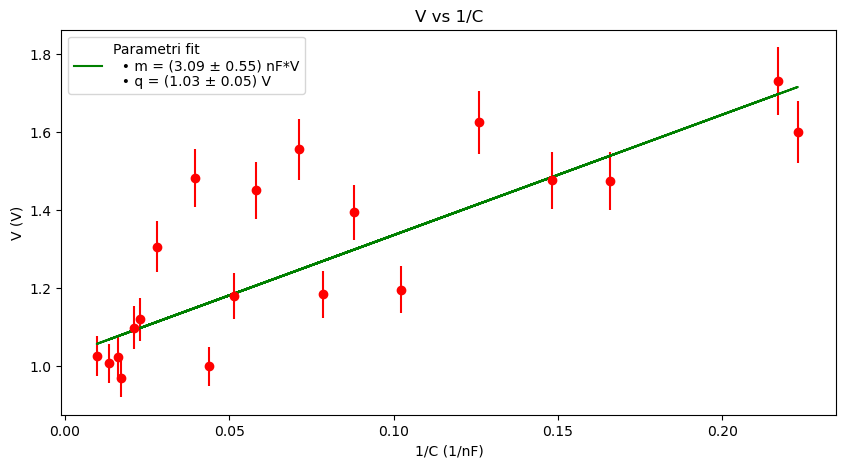

In [42]:
plt.figure(figsize=(10, 5))
plt.errorbar(c_rev, v, yerr = err_v, xerr = err_c_rev,fmt = "o", color = "red")
label_fit = (
    "Parametri fit"
    "\n  • " + f"m = ({par[0]:.2f} ± {dev_std[0]:.2f}) nF*V"
    "\n  • " + f"q = ({par[1]:.2f} ± {dev_std[1]:.2f}) V"
)
plt.plot(
    c_rev,
    linear_func(par, c_rev),
    color="green",
    label=label_fit)
plt.title("V vs 1/C")
plt.xlabel("1/C (1/nF)")
plt.legend()
plt.ylabel("V (V)")

## Algoritmo per la convergeza di K_B

Nota bene: in questo processo vanno DIVISI  per $Z$ i valori ORIGINARIAMENTE misurati di $V_2$

In [43]:
print(list(c))
# print(c)

[9.77, 12.72, 4.486, 22.8, 35.71, 6.743, 6.029, 74.88, 62.4, 4.612, 14.05, 11.39, 43.88, 25.31, 7.935, 103.7, 17.23, 19.43, 58.8, 47.6]


In [44]:
eff = 5
count = 0
iter_max = 100
eps = np.array([10.7, 9.1, 18, 6.2, 5.5, 18, 18, 6.8, 6.3, 18, 8.2, 9.7, 5.5, 5.9, 18, 8.5, 7, 6.6, 6, 5.7])
Z = 1 - eps/100
q_atteso = 0 
v_new = []
q_values = []   
m_values = []  
err_q_values = []
err_m_values = []

v0 = v.copy()  # salvo i valori originariamente misurati

while eff > 0.0001 and count < iter_max:
    
    # fit lineare su c_rev e v correnti
    par, dev_std = fit_lineare(c_rev, v, err_c_rev, err_v)
    m, q = par
    err_m, err_q = dev_std
    
    q_values.append(q)
    m_values.append(m)
    err_q_values.append(err_q)
    err_m_values.append(err_m)
    
    # calcolo nuova v correggendo i valori originali
    q_sum = np.sum(q_values)
    v_new = (v0 - q_sum) / Z
    
    # aggiorno per iterazione successiva
    v = v_new.copy()
    
    eff = abs(q - q_atteso)
    count += 1

print(f"Convergenza raggiunta dopo {count} iterazioni: q → {q:.3f}")

# stampa dei valori di q durante le iterazioni
print("\nValori di q durante le iterazioni:")
for i, val in enumerate(q_values, start=1):
    print(f"Iterazione {i}: q = {val:.6f}")

Convergenza raggiunta dopo 4 iterazioni: q → -0.000

Valori di q durante le iterazioni:
Iterazione 1: q = 1.027393
Iterazione 2: q = -0.014087
Iterazione 3: q = 0.000652
Iterazione 4: q = -0.000019


Text(0, 0.5, 'V (V)')

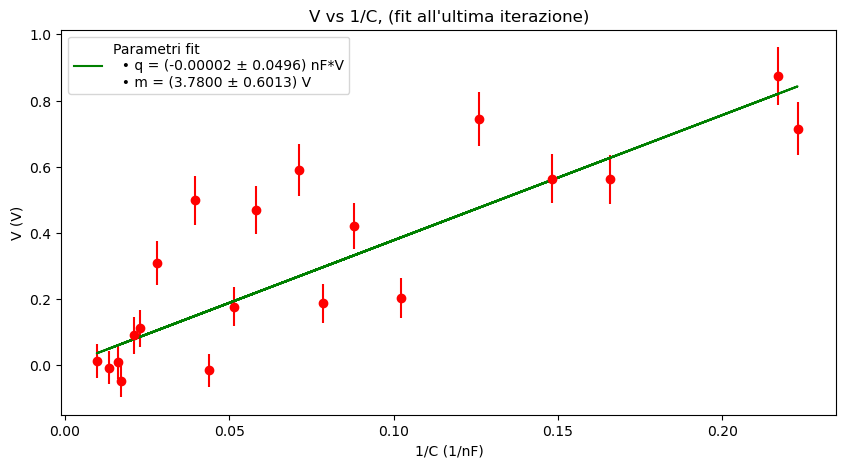

In [58]:
plt.figure(figsize=(10, 5))
plt.errorbar(c_rev, v_new, yerr = err_v, xerr = err_c_rev,fmt = "o", color = "red")
label_fit = (
    "Parametri fit"
    "\n  • " + f"q = ({q_values[-1]:.5f} ± {err_q_values[-1]:.4f}) nF*V"
    "\n  • " + f"m = ({m_values[-1]:.4f} ± {err_m_values[-1]:.4f}) V"
)
plt.plot(
    c_rev,
    linear_func(par, c_rev),
    color="green",
    label=label_fit)
plt.title("V vs 1/C, (fit all'ultima iterazione)")
plt.xlabel("1/C (1/nF)")
plt.legend()
plt.ylabel("V (V)")

In [57]:
print(q_values)
print(m_values)
print(err_m_values)

[1.0273932315124599, -0.014086725078721694, 0.0006517583788672204, -1.880521945962409e-05]
[3.0866958898083636, 3.7683750924944914, 3.7806318677007673, 3.779965107387114]
[0.554981066855676, 0.6016395767733992, 0.6016680613995559, 0.6013034829026023]


In [65]:
print(f"valore del coefficiente angolare = {m_values[-1]}")
print(f"kB  = {m_values[-1]/T*U_star*10**-9} +- {err_m_values[-1]/T*U_star*10**-9}")

valore del coefficiente angolare = 3.779965107387114
kB  = 1.438759689878261e-23 +- 2.2887280385021452e-24
